#**Aula 1: Realizando a primeira previsão**

##**Conhecendo os dados**

> Você pode checar a documentação da biblioteca Pandas [aqui](https://pandas.pydata.org/).

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/series_temporais_prophet/main/Dados/poluentes.csv')

In [ ]:
df

,Data,PM2.5,PM10,SO2,NO2,CO,O3,TEMP
0,2020-03-01,7.0,11.0,12.0,23.0,429.0,64.0,1.0
1,2020-03-02,31.0,42.0,37.0,67.0,825.0,30.0,1.0
2,2020-03-03,77.0,121.0,61.0,81.0,1621.0,19.0,6.0
3,2020-03-04,23.0,45.0,23.0,46.0,606.0,54.0,10.0
4,2020-03-05,149.0,184.0,94.0,133.0,2358.0,68.0,6.0
...,...,...,...,...,...,...,...,...
1455,2024-02-24,22.0,33.0,17.0,59.0,575.0,51.0,5.0
1456,2024-02-25,11.0,20.0,7.0,43.0,421.0,66.0,7.0
1457,2024-02-26,28.0,41.0,10.0,65.0,721.0,49.0,7.0
1458,2024-02-27,75.0,97.0,21.0,98.0,1427.0,37.0,8.0


In [ ]:
df['Data'] = pd.to_datetime(df['Data'])

In [ ]:
import plotly.express as px

fig = px.line(df, x='Data', y='O3')
fig.show()

In [ ]:
import calendar

# Criar um DataFrame com os dados de 2022
df_2022 = df[df['Data'].dt.year == 2022]

# Agrupar os dados por mês e calcule a média de O3
df_2022_mensal = df_2022.groupby(df_2022['Data'].dt.month)['O3'].mean().reset_index()

# Adicionar uma coluna com os nomes dos meses
df_2022_mensal['Mês'] = df_2022_mensal['Data'].apply(lambda x: calendar.month_abbr[x])

# Criar um gráfico de barras
fig = px.bar(df_2022_mensal, x='Mês', y='O3', title='Média de O3 ug/m3 por mês em 2022')

# Mostrar o gráfico
fig.show()

##**Realizando uma previsão**

> Você pode checar a documentação da biblioteca Prophet [aqui](https://facebook.github.io/prophet/).

In [ ]:
from prophet import Prophet

In [ ]:
df_prophet = pd.DataFrame()

df_prophet['ds'] = df['Data']
df_prophet['y'] = df['O3']

In [ ]:
df_prophet

,ds,y
0,2020-03-01,64.0
1,2020-03-02,30.0
2,2020-03-03,19.0
3,2020-03-04,54.0
4,2020-03-05,68.0
...,...,...
1455,2024-02-24,51.0
1456,2024-02-25,66.0
1457,2024-02-26,49.0
1458,2024-02-27,37.0


In [ ]:
# Definir um seed
import numpy as np
np.random.seed(4587)

# Instanciar o modelo Prophet
modelo = Prophet()

# Treinar o modelo
modelo.fit(df_prophet)

# Criar um dataframe para previsões futuras
futuro = modelo.make_future_dataframe(periods=365, freq='D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu064sqq2/ik8zk1rg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu064sqq2/m5q6atgm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36772', 'data', 'file=/tmp/tmpu064sqq2/ik8zk1rg.json', 'init=/tmp/tmpu064sqq2/m5q6atgm.json', 'output', 'file=/tmp/tmpu064sqq2/prophet_modeltfkaan6x/prophet_model-20240627160154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:01:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:01:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
from prophet.plot import plot_plotly
fig = plot_plotly(modelo, previsao)
fig.show()

In [ ]:
previsao

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-01,36.708750,-11.423571,49.879511,36.708750,36.708750,-17.570460,-17.570460,-17.570460,-2.094423,-2.094423,-2.094423,-15.476037,-15.476037,-15.476037,0.0,0.0,0.0,19.138290
1,2020-03-02,36.736524,-6.297502,54.194609,36.736524,36.736524,-13.465359,-13.465359,-13.465359,0.919980,0.919980,0.919980,-14.385338,-14.385338,-14.385338,0.0,0.0,0.0,23.271165
2,2020-03-03,36.764298,-7.189595,56.245281,36.764298,36.764298,-10.614908,-10.614908,-10.614908,2.599164,2.599164,2.599164,-13.214072,-13.214072,-13.214072,0.0,0.0,0.0,26.149390
3,2020-03-04,36.792072,-5.920984,55.542039,36.792072,36.792072,-11.796323,-11.796323,-11.796323,0.186921,0.186921,0.186921,-11.983244,-11.983244,-11.983244,0.0,0.0,0.0,24.995749
4,2020-03-05,36.819846,-3.379147,56.557718,36.819846,36.819846,-10.523998,-10.523998,-10.523998,0.190901,0.190901,0.190901,-10.714899,-10.714899,-10.714899,0.0,0.0,0.0,26.295848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,2025-02-23,62.126743,9.516483,69.112572,60.551676,63.523067,-21.557137,-21.557137,-21.557137,-2.094423,-2.094423,-2.094423,-19.462714,-19.462714,-19.462714,0.0,0.0,0.0,40.569606
1821,2025-02-24,62.124323,13.974234,73.743592,60.543791,63.529653,-18.292881,-18.292881,-18.292881,0.919980,0.919980,0.919980,-19.212860,-19.212860,-19.212860,0.0,0.0,0.0,43.831442
1822,2025-02-25,62.121903,16.612816,76.757365,60.535905,63.536142,-16.206558,-16.206558,-16.206558,2.599164,2.599164,2.599164,-18.805722,-18.805722,-18.805722,0.0,0.0,0.0,45.915345
1823,2025-02-26,62.119482,13.276886,73.417160,60.528020,63.538583,-18.058197,-18.058197,-18.058197,0.186921,0.186921,0.186921,-18.245118,-18.245118,-18.245118,0.0,0.0,0.0,44.061285


In [ ]:
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-03-01,19.138290,-11.423571,49.879511
1,2020-03-02,23.271165,-6.297502,54.194609
2,2020-03-03,26.149390,-7.189595,56.245281
3,2020-03-04,24.995749,-5.920984,55.542039
4,2020-03-05,26.295848,-3.379147,56.557718
...,...,...,...,...
1820,2025-02-23,40.569606,9.516483,69.112572
1821,2025-02-24,43.831442,13.974234,73.743592
1822,2025-02-25,45.915345,16.612816,76.757365
1823,2025-02-26,44.061285,13.276886,73.417160


##**Analisando as componentes da série temporal**

In [ ]:
from prophet.plot import plot_components_plotly

plot_components_plotly(modelo, previsao)

A biblioteca Prophet usa um modelo aditivo que inclui componentes sazonais e de tendência. A equação utilizada pelo Prophet para realizar previsões pode ser representada da seguinte forma:

$y(t) = g(t) + s(t) + h(t) + \epsilon_t$

Onde:

- $ y(t)$ é o valor observado na série temporal no tempo \( t \).
- $ g(t) $ é a componente de tendência que modela mudanças de longo prazo.
- $ s(t) $ é a componente sazonal que modela padrões periódicos ou sazonais.
- $ h(t) $ é a componente de efeito de feriados
- $\epsilon_t$ é o erro aleatório na previsão.

Cada uma dessas componentes é modelada separadamente. A componente de tendência, $ g(t)$, é frequentemente modelada como uma função logística ou polinomial. A componente sazonal, $s(t)$, é modelada usando a análise de Fourier para capturar padrões periódicos. A componente de feriado, $h(t)$, é modelada como um efeito aditivo para cada feriado especificado.

Portanto, a equação completa usada pelo Prophet para realizar previsões é uma soma desses componentes mais o erro aleatório.

> Embora em nosso projeto não tenhamos detalhado a inclusão dos feriados no modelo, é importante ressaltar que essa possibilidade existe.

#**Aula 2: Analisando a performance do modelo**

##**Separando os dados em treino e teste**

Separar os dados em conjuntos de treino e teste é fundamental em modelos de série temporal para avaliar a capacidade de generalização do modelo. Imagine que você está treinando um modelo para prever o número de vendas de uma empresa. Se você treinar o modelo com todos os dados disponíveis e depois testá-lo com os mesmos dados, ele pode parecer ótimo, mas na prática pode falhar em prever o futuro.

Isso acontece porque o modelo pode simplesmente memorizar os padrões específicos dos dados de treinamento, sem realmente aprender a identificar padrões gerais que se aplicam a novos dados. Ao separar os dados em treino e teste, você simula o cenário de previsão futura, garantindo que o modelo seja avaliado em sua capacidade de generalização, ou seja, em sua habilidade de fazer previsões precisas em dados que nunca viu antes. Isso ajuda a garantir que o modelo seja robusto e confiável quando usado para fazer previsões no mundo real.

In [ ]:
df_prophet.shape

(1460, 2)

In [ ]:
tamanho_treino = int(len(df_prophet) * 0.8)
tamanho_teste = int(len(df_prophet) * 0.2)
print('O tamanho do treino é:', tamanho_treino)
print('O tamanho do teste é:', tamanho_teste)

O tamanho do treino é: 1168
O tamanho do teste é: 292


In [ ]:
df_treino = pd.DataFrame()

df_treino['ds'] = df_prophet['ds'][:1168] # 80% treino
df_treino['y'] = df_prophet['y'][:1168]

In [ ]:
df_teste = pd.DataFrame()

df_teste['ds'] = df_prophet['ds'][1168:] # 20% teste
df_teste['y'] = df_prophet['y'][1168:]

##**Treinando o modelo**

In [ ]:
# Definir um seed
import numpy as np
np.random.seed(4587)

# Instanciar o modelo Prophet
modelo = Prophet()

# Treinar o modelo
modelo.fit(df_treino)

# Criar um dataframe para previsões futuras
futuro = modelo.make_future_dataframe(periods=292, freq='D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu064sqq2/t655hzt5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu064sqq2/1kxpmzcb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1496', 'data', 'file=/tmp/tmpu064sqq2/t655hzt5.json', 'init=/tmp/tmpu064sqq2/1kxpmzcb.json', 'output', 'file=/tmp/tmpu064sqq2/prophet_model97y58nff/prophet_model-20240627160236.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:02:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:02:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


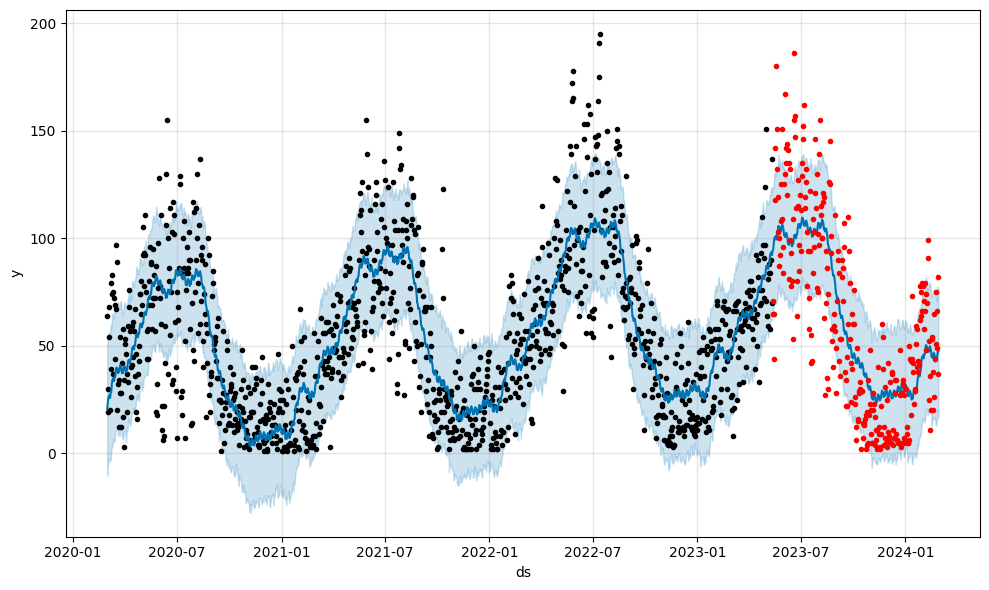

In [ ]:
fig1 = modelo.plot(previsao)

import matplotlib.pyplot as plt
plt.plot(df_teste['ds'], df_teste['y'], '.r')
plt.show()

##**Obtendo métricas de performance**

In [ ]:
# Juntando previsões com o conjunto de teste para comparação
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds', how='inner')
df_comparacao

,ds,yhat,y
0,2023-05-13,94.354778,65.0
1,2023-05-14,94.701462,71.0
2,2023-05-15,97.764579,44.0
3,2023-05-16,100.048702,65.0
4,2023-05-17,100.330364,118.0
...,...,...,...
287,2024-02-24,43.913883,51.0
288,2024-02-25,43.408351,66.0
289,2024-02-26,45.756511,49.0
290,2024-02-27,47.476012,37.0


A métrica MSE *(Mean Squared Error)* é uma medida comum de avaliação de desempenho para modelos de regressão e previsão. Ela calcula a média dos quadrados das diferenças entre os valores previstos pelo modelo e os valores reais observados nos dados de teste. Matematicamente, o MSE é calculado pela fórmula:

$MSE = \frac{\sum_{} (y_i - \hat{y}_i)^2}{n}$

No entanto, o MSE tem uma limitação: suas unidades são quadráticas em relação às unidades originais dos dados. Isso pode tornar difícil interpretar o seu valor
Para superar essa limitação, muitas vezes é preferível usar o RMSE *(Root Mean Squared Error)*. O RMSE é simplesmente a raiz quadrada do MSE e é calculado pela fórmula:

$RMSE = \sqrt{MSE}$


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculando métricas de erro
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat']).round(2)
rmse = np.sqrt(mse).round(2)

print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 710.73, RMSE: 26.66


#**Aula 3: Melhorando o modelo**

##**Removendo outliers**

In [ ]:
# Definir um seed
import numpy as np
np.random.seed(4587)

# Instanciar o modelo Prophet
modelo = Prophet()

# Treinar o modelo
modelo.fit(df_prophet)

# Criar um dataframe para previsões futuras
futuro = modelo.make_future_dataframe(periods=0, freq='D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu064sqq2/4enupduc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu064sqq2/ba4psvk6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8628', 'data', 'file=/tmp/tmpu064sqq2/4enupduc.json', 'init=/tmp/tmpu064sqq2/ba4psvk6.json', 'output', 'file=/tmp/tmpu064sqq2/prophet_modela_jipvg8/prophet_model-20240627160254.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:02:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:02:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
sem_outliers = df_prophet[(df_prophet['y'] > previsao['yhat_lower'])&(df_prophet['y'] < previsao['yhat_upper'])]

In [ ]:
sem_outliers.reset_index(drop=True, inplace=True)

In [ ]:
tamanho_treino = int(len(sem_outliers) * 0.8)
tamanho_teste = int(len(sem_outliers) * 0.2)
print('O tamanho do treino é:', tamanho_treino)
print('O tamanho do teste é:', tamanho_teste)

O tamanho do treino é: 960
O tamanho do teste é: 240


In [ ]:
df_treino_sem_outliers = pd.DataFrame()

df_treino_sem_outliers['ds'] = sem_outliers['ds'][:960]
df_treino_sem_outliers['y'] = sem_outliers['y'][:960]

In [ ]:
df_teste_sem_outliers = pd.DataFrame()

df_teste_sem_outliers['ds'] = sem_outliers['ds'][960:]
df_teste_sem_outliers['y'] = sem_outliers['y'][960:]

##**Treinando o modelo sem os outliers**

In [ ]:
# Definir um seed
import numpy as np
np.random.seed(4587)

# Instanciar o modelo Prophet
modelo = Prophet()

# Treinar o modelo
modelo.fit(df_treino_sem_outliers)

# Criar um dataframe para previsões futuras
futuro = modelo.make_future_dataframe(periods=365, freq='D')

# Fazer a previsão
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvn3dzum9/r55y4_dp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvn3dzum9/zro82ykz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56220', 'data', 'file=/tmp/tmpvn3dzum9/r55y4_dp.json', 'init=/tmp/tmpvn3dzum9/zro82ykz.json', 'output', 'file=/tmp/tmpvn3dzum9/prophet_modelmxbjcur7/prophet_model-20240626124554.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:45:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:45:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


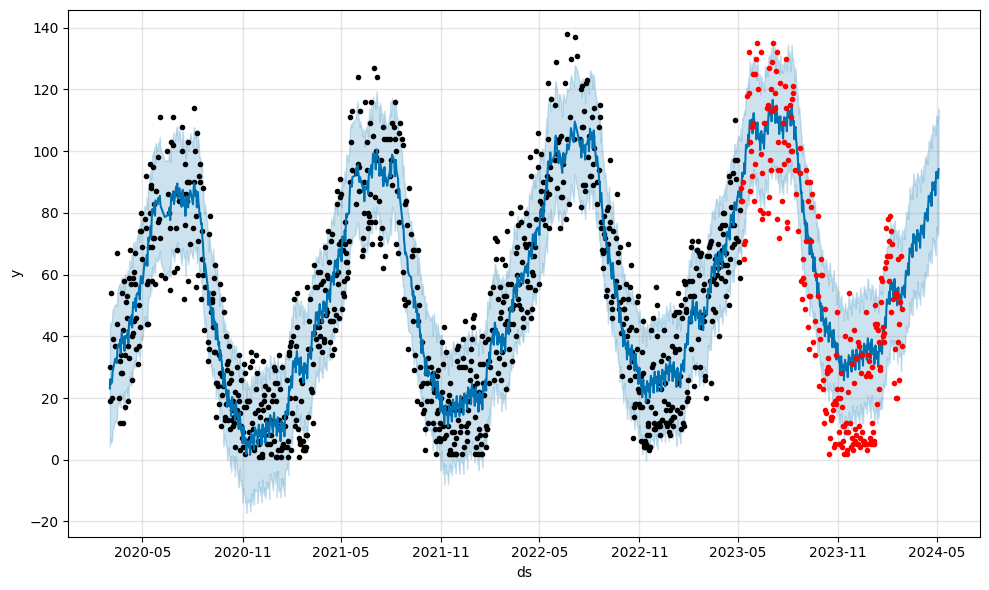

In [ ]:
fig1 = modelo.plot(previsao)

import matplotlib.pyplot as plt
plt.plot(df_teste_sem_outliers['ds'], df_teste_sem_outliers['y'], '.r')

In [ ]:
# Juntando previsões com o conjunto de teste para comparação
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste_sem_outliers, on='ds', how='inner')

# Calculando o RMSE
rmse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'], squared=False).round(2)
print(f'RMSE: {rmse}')

RMSE: 19.58


##**Conhecendo parâmetros do Prophet**

###**`changepoint_prior_scale`**

 `changepoint_prior_scale` é um parâmetro que regula a flexibilidade do modelo em relação à detecção de mudanças de tendência nos dados. O valor padrão deste parâmetro é 0.05, o que oferece um equilíbrio moderado entre sensibilidade e estabilidade nas mudanças de tendência. Se aumentado, o modelo se torna mais sensível a mudanças, identificando mais pontos de mudança, o que pode ser útil em alguns casos. Por outro lado, um valor mais baixo torna o modelo menos flexível, podendo ignorar algumas mudanças reais na tendência dos dados.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvn3dzum9/uow17r5s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvn3dzum9/_ra3m8fg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77287', 'data', 'file=/tmp/tmpvn3dzum9/uow17r5s.json', 'init=/tmp/tmpvn3dzum9/_ra3m8fg.json', 'output', 'file=/tmp/tmpvn3dzum9/prophet_modelau_ot2ci/prophet_model-20240626124615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:46:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:46:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


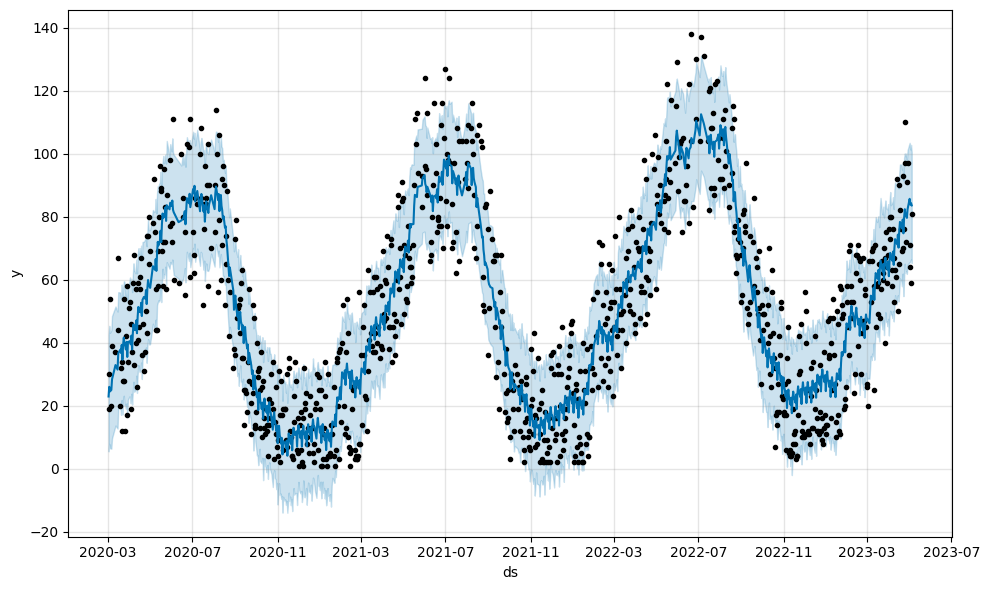

In [ ]:
# Definir um seed
import numpy as np
np.random.seed(4587)

# Instanciar o modelo Prophet
modelo = Prophet(changepoint_prior_scale=0.5)

# Treinar o modelo
modelo.fit(df_treino_sem_outliers)

# Criar um dataframe para previsões futuras
futuro = modelo.make_future_dataframe(periods=0, freq='D')

# Fazer a previsão
previsao = modelo.predict(futuro)

#Plotar previsão
fig = modelo.plot(previsao)

In [ ]:
fig = plot_components_plotly(modelo, previsao)
fig.show()

###**`yearly_seasonality`**

A	 sazonalidade	 é	 estimada	 usando	 a	 soma	 parcial	 da	Série	 de
Fourier.	 Então,	 o	 número	 de	 termos	 na	 soma	 parcial	 é	 um
parâmetro	que	determina	a	rapidez	com	que	a	sazonalidade	pode
mudar. A	Série	de	Fourier	padrão	para	sazonalidade	anual	é	10. O	valor	padrão	geralmente	é	apropriado,	mas	pode	ser
aumentado quando	a	 sazonalidade	precisa	 se	ajustar	a	alterações
de	frequência	mais	alta	e	geralmente	são	menos	suaves.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvn3dzum9/l0pz499h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvn3dzum9/4mzqx_rl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20811', 'data', 'file=/tmp/tmpvn3dzum9/l0pz499h.json', 'init=/tmp/tmpvn3dzum9/4mzqx_rl.json', 'output', 'file=/tmp/tmpvn3dzum9/prophet_model6o7zha3z/prophet_model-20240626124645.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:46:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:46:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


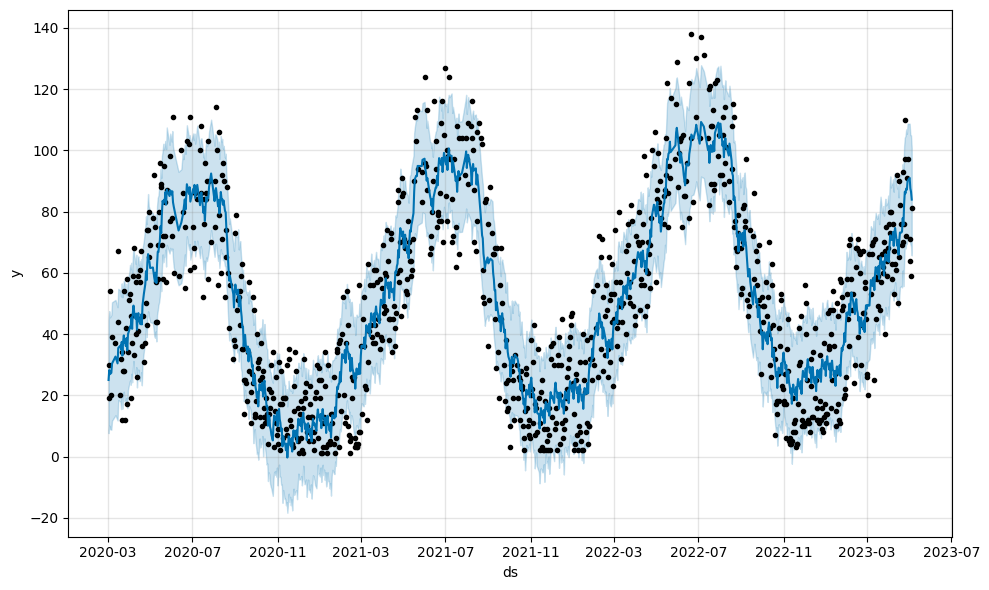

In [ ]:
# Definir um seed
import numpy as np
np.random.seed(4587)

# Instanciar o modelo Prophet
modelo = Prophet(yearly_seasonality=20)

# Treinar o modelo
modelo.fit(df_treino_sem_outliers)

# Criar um dataframe para previsões futuras
futuro = modelo.make_future_dataframe(periods=0, freq='D')

# Fazer a previsão
previsao = modelo.predict(futuro)

#Plotar previsão
fig = modelo.plot(previsao)

In [ ]:
fig = plot_components_plotly(modelo, previsao)
fig.show()

##**Ajustando os parâmetros do modelo**

In [ ]:
# Definir um seed
import numpy as np
np.random.seed(4587)

# Instanciar o modelo Prophet
modelo_final = Prophet(changepoint_prior_scale=0.5,
                  yearly_seasonality=20)

# Treinar o modelo
modelo_final.fit(df_treino_sem_outliers)

# Criar um dataframe para previsões futuras
futuro = modelo_final.make_future_dataframe(periods=365, freq='D')

# Fazer a previsão
previsao = modelo_final.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvn3dzum9/0tj_7x15.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvn3dzum9/vypsf_ld.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21414', 'data', 'file=/tmp/tmpvn3dzum9/0tj_7x15.json', 'init=/tmp/tmpvn3dzum9/vypsf_ld.json', 'output', 'file=/tmp/tmpvn3dzum9/prophet_modelwpokf6wd/prophet_model-20240626124659.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:46:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:46:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


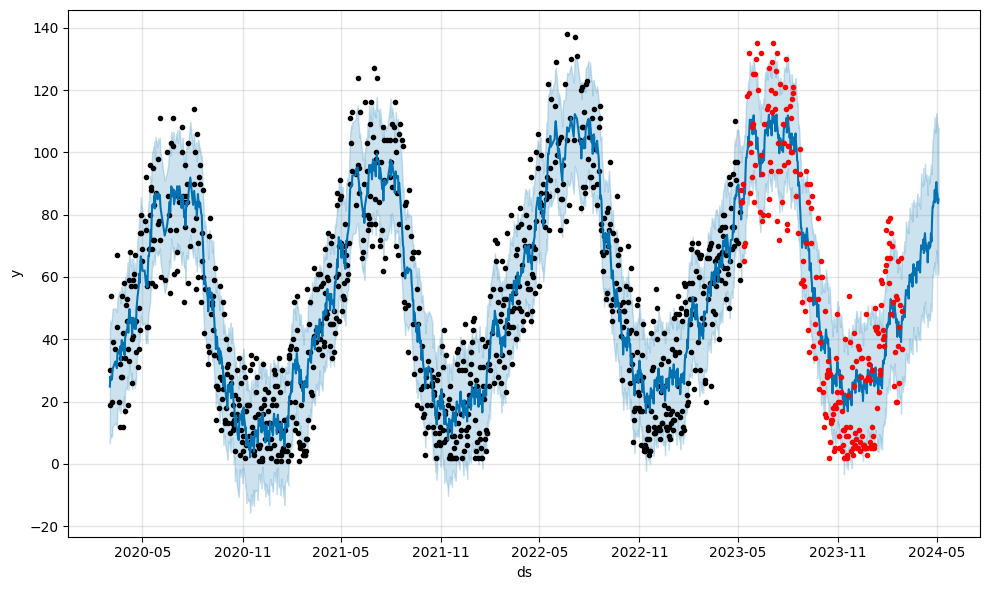

In [ ]:
fig1 = modelo.plot(previsao)

import matplotlib.pyplot as plt
plt.plot(df_teste_sem_outliers['ds'], df_teste_sem_outliers['y'], '.r')

In [ ]:
# Juntando previsões com o conjunto de teste para comparação
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste_sem_outliers, on='ds', how='inner')

# Calculando o RMSE
rmse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'], squared=False).round(2)
print(f'RMSE: {rmse}')

RMSE: 17.43


#**Aula 4: Validando o modelo**

##**Aplicando a validação cruzada**

Você	 já	 deve	 ter	 notado	 que	 o	 conceito	 de	 separar	 dados	 em
treino	e	teste	é	algo	fundamental	quando	estamos	trabalhando	com
aprendizado	de	máquina.	Porém,	se	não	tivermos	muitas	amostras
ou	muitas	datas	de	exemplo	nos	dados	de	 teste	podemos	 ter	bons
resultados	 nesses	 dados	 apenas	 devido	 ao	 acaso.	 Portanto,
queremos	 testar	 mais	 o	 nosso	 o	 modelo	 para	 estimar	 a	 sua
performance	 em	 dados	 que	 não	foram	vistos	 durante	 o	 treino.	A
*cross-validation* (validação	 cruzada)	 é	 uma	 técnica	 que	 é	 usada
para	contornar	esse	problema.


O	 Prophet	 inclui	 uma	 funcionalidade	 para	 validação	 cruzada
de	 séries	 temporais,	 com	 o	 objetivo	 de	medir	 o	 erro	 de	 previsão.
Isso	é	feito	selecionando	pontos	de	corte	(cutoffs)	e,	para	cada	um
deles,	é	ajustado	o	modelo	usando	dados	somente	até	aquele	ponto
de	 corte.	 Podemos	 então	 comparar	 os	 valores	 previstos	 com	 os
valores	reais.
A	 figura	 a	 seguir	 ilustra	 uma	 previsão	 onde	 o	 modelo	 se
ajustou	a	um	histórico	inicial	de	5	anos,	e	uma	previsão	foi	feita	no
horizonte	de	um	ano:

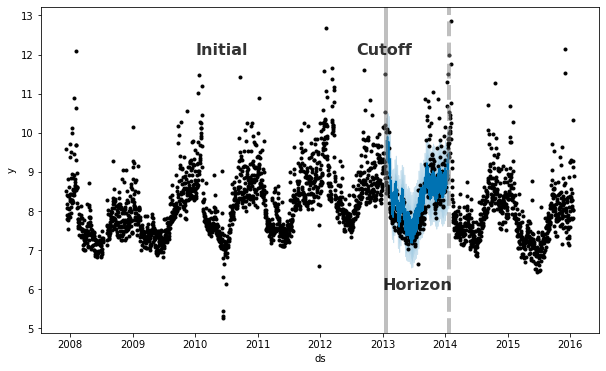

Na	figura,	 temos	 a	 região	inicial	 chamada	 de	 	**initial**	,	 que
corresponde	 ao	 primeiro	 período	 de	 treinamento.	 Em	 seguida,
temos	o		***cutoff***	:	o	ponto	de	corte,	ou	seja,	é	a	data	em	que	cada
**horizon**		começará.

Para	cada		*cutoff*	,	o	modelo	é	treinado	em
todos	os	dados	até	esse		*cutoff*		e,	em	seguida,	uma	previsão	será
feita	para	o	período	do		*horizon*	.
Essa	 previsão	 é	 comparada	 com	 os	 valores	 conhecidos	 e
avaliados.	Em	 seguida,	 o	modelo	é	 treinado	novamente	em	 todos
os	 dados	 até	 o	 segundo	 	*cutoff*		 e	 o	 processo	 será	 repetido.	 A
avaliação	final	de	desempenho	é	a	média	do	desempenho	em	cada
	*cutoff*	.
Além	disso,	temos	outro	termo	que	não	está	apresentado	neste
gráfico,	que	é	o		**period**	,	a	quantidade	de	tempo	de	cada		*cutoff*.

In [ ]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(modelo_final, initial='365.25 days', period='45 days', horizon = '90 days')

INFO:prophet:Making 16 forecasts with cutoffs between 2021-03-31 00:00:00 and 2023-02-04 00:00:00


  0%|          | 0/16 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvn3dzum9/wedtmi6f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvn3dzum9/j4kucych.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19918', 'data', 'file=/tmp/tmpvn3dzum9/wedtmi6f.json', 'init=/tmp/tmpvn3dzum9/j4kucych.json', 'output', 'file=/tmp/tmpvn3dzum9/prophet_modelqenyeesx/prophet_model-20240626134657.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:46:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:46:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvn3dzum9/r0oyox9z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvn3dzum9/97n87i4d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-04-01,46.872612,31.349224,63.213772,55.0,2021-03-31
1,2021-04-02,45.309697,28.510646,63.393176,69.0,2021-03-31
2,2021-04-03,47.311729,31.056689,65.262839,49.0,2021-03-31
3,2021-04-04,44.904228,28.096709,61.273052,47.0,2021-03-31
4,2021-04-05,53.584888,36.842046,69.943541,60.0,2021-03-31


In [ ]:
df_cv['cutoff'].unique()

<DatetimeArray>
['2021-03-31 00:00:00', '2021-05-15 00:00:00', '2021-06-29 00:00:00',
 '2021-08-13 00:00:00', '2021-09-27 00:00:00', '2021-11-11 00:00:00',
 '2021-12-26 00:00:00', '2022-02-09 00:00:00', '2022-03-26 00:00:00',
 '2022-05-10 00:00:00', '2022-06-24 00:00:00', '2022-08-08 00:00:00',
 '2022-09-22 00:00:00', '2022-11-06 00:00:00', '2022-12-21 00:00:00',
 '2023-02-04 00:00:00']
Length: 16, dtype: datetime64[ns]

##**Analisando métricas**

In [ ]:
from prophet.diagnostics import performance_metrics

In [ ]:
df_p = performance_metrics(df_cv)

In [ ]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,10 days,347.896286,18.651978,15.446693,1.128791,0.288494,0.463744,0.583652
1,11 days,343.917691,18.545018,15.389844,1.154616,0.281663,0.475339,0.568067
2,12 days,333.867840,18.272051,15.435380,1.222640,0.281663,0.489763,0.568067
3,13 days,349.204741,18.687021,15.788701,1.243224,0.299044,0.500141,0.575630
4,14 days,358.730517,18.940183,16.223494,1.237546,0.353787,0.514671,0.567827
...,...,...,...,...,...,...,...,...
76,86 days,299.280859,17.299736,14.979205,0.517864,0.271959,0.359660,0.597403
77,87 days,273.419441,16.535400,14.263900,0.411797,0.252527,0.324361,0.640336
78,88 days,290.313648,17.038593,14.843051,0.457049,0.261009,0.341694,0.621849
79,89 days,303.765370,17.428866,15.023528,0.493190,0.271959,0.356000,0.610213


In [ ]:
df_p['rmse'].mean().round(2)

17.93

In [ ]:
df_p['mae'].mean().round(2)

14.97

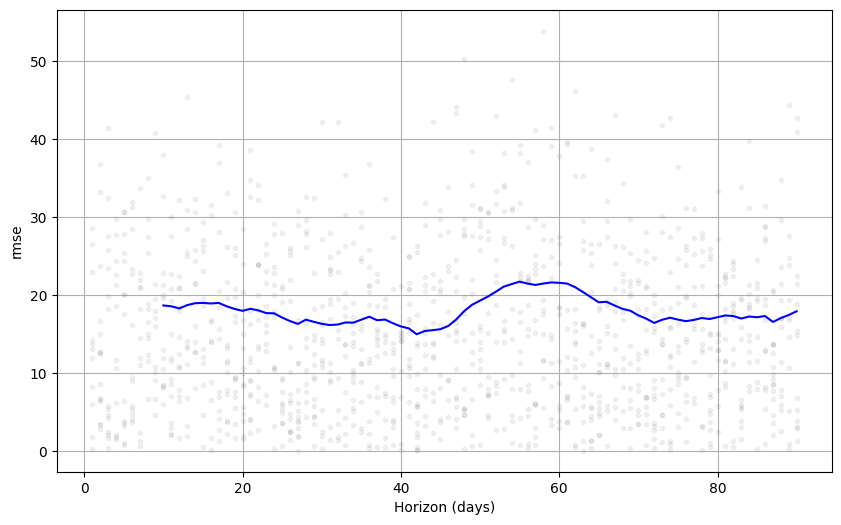

In [ ]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv,metric='rmse');

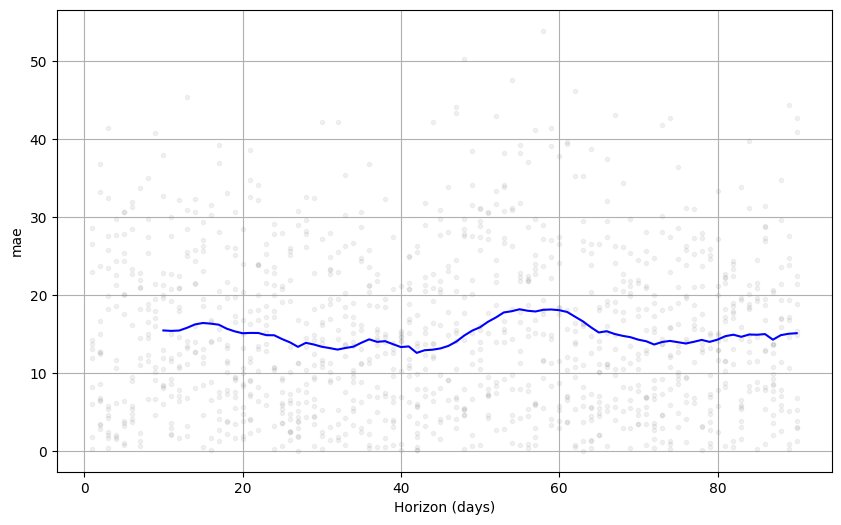

In [ ]:
plot_cross_validation_metric(df_cv,metric='mae');

##**Salvando o modelo**

In [ ]:
import json

In [ ]:
from prophet.serialize import model_to_json

In [ ]:
with open('modelo_O3_prophet.json', 'w') as file_out:
    json.dump(model_to_json(modelo_final), file_out)